In [250]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

def plt_show0(*b):
    '''显示一个彩色的图片，这个图片必须是一个array'''
    for img in b:
        plt.imshow(img)
        plt.show()

def plt_show(*b):
    '''显示一个只有灰度的图片'''
    for img in b:
        plt.imshow(img,cmap='gray')
        plt.show()

def img_read(path):
    image = cv2.imread(path)
    b,g,r = cv2.split(image)
    image = cv2.merge([r,g,b])
    return image

In [381]:
path = 'source/*.jpg'
image = img_read(path)
image1 = image[:,:1000]
image2 = image[:,1000:]

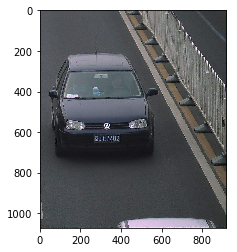

In [382]:
plt_show0(image2)

In [260]:
# 高斯去噪
image1 = cv2.GaussianBlur(image1,(3,3),0)
image2 = cv2.GaussianBlur(image2,(3,3),0)

#灰度处理 
gray = cv2.COLOR_BGR2GRAY

gray_image1 = cv2.cvtColor(image1,gray)
gray_image2 = cv2.cvtColor(image2,gray)

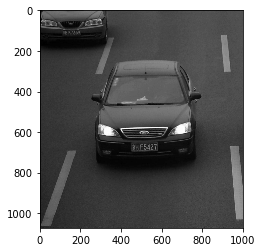

In [261]:
plt_show(gray_image1)

In [262]:
#  sobel算子边缘检测
Sobel_x = cv2.Sobel(gray_image1, cv2.CV_16S, 1, 0)

image = cv2.convertScaleAbs(Sobel_x)

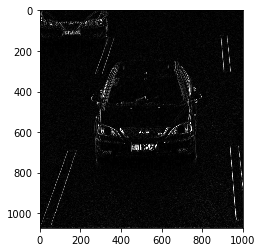

In [263]:
plt_show(image)

In [265]:
# 阀处理（0,255）
ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

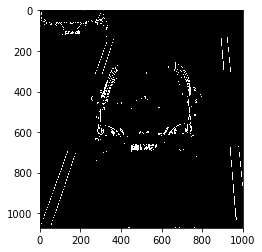

In [266]:
plt_show(image)

In [273]:
k_shape = (5,17)
kernelX = np.ones(k_shape,dtype='uint8')

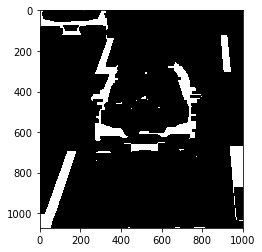

In [275]:
# 闭运算,将白色部分练成整体
# kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 5))
# print(kernelX)
image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernelX,iterations = 3)
plt_show(image)

In [276]:
# 去除一些小的白点
kernelX = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
kernelY = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 19))
# 膨胀，腐蚀
image = cv2.dilate(image, kernelX)
image = cv2.erode(image, kernelX)
# 腐蚀，膨胀
image = cv2.erode(image, kernelY)
image = cv2.dilate(image, kernelY)

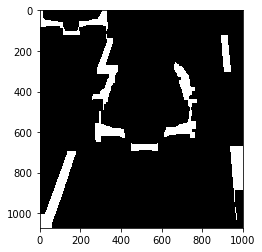

In [258]:
plt_show(image)

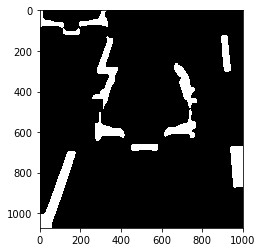

In [277]:
# 中值滤波去除噪点
image = cv2.medianBlur(image, 15)
plt_show(image)

In [283]:
# 寻找轮廓
contours,hierarchy,h = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

第1个矩阵形状： (469, 1, 2)


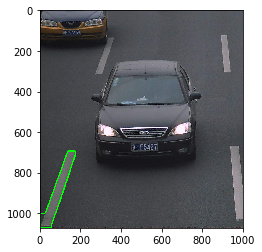

第2个矩阵形状： (48, 1, 2)


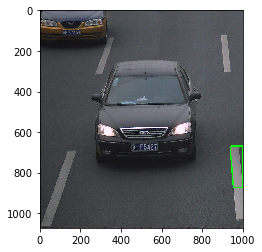

第3个矩阵形状： (46, 1, 2)


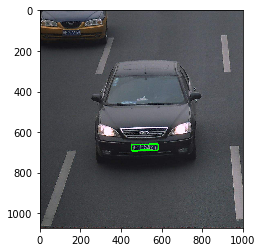

第4个矩阵形状： (135, 1, 2)


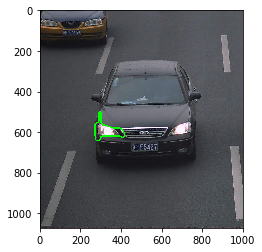

第5个矩阵形状： (184, 1, 2)


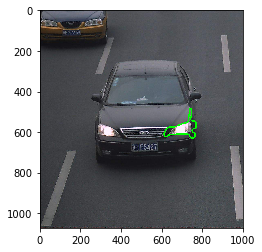

第6个矩阵形状： (251, 1, 2)


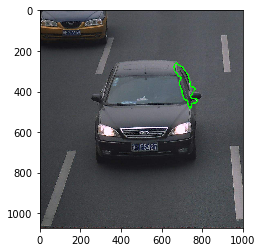

第7个矩阵形状： (435, 1, 2)


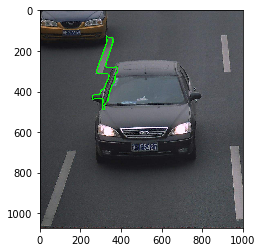

第8个矩阵形状： (76, 1, 2)


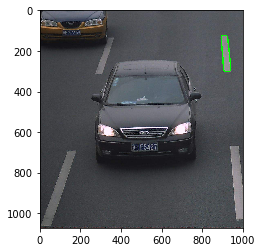

第9个矩阵形状： (135, 1, 2)


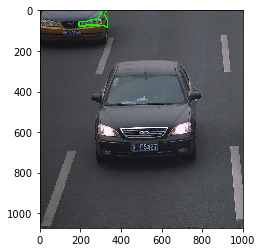

第10个矩阵形状： (139, 1, 2)


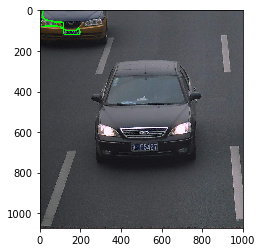

In [383]:
# 可以将按 ESC+Y ,将本cell转化为python cell，查看详细结果
n = 0
for i in hierarchy:
    n += 1  # 画出轮廓
    print('第{}个矩阵形状：'.format(n),i.shape)
    image1_1 = image1.copy()
    cv2.drawContours(image1_1, hierarchy,n-1, (0, 255, 0), 5)
    plt_show(image1_1)

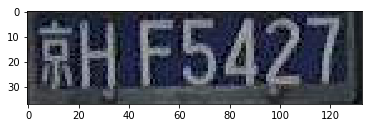

True

In [388]:
for i in hierarchy:
    rect = cv2.boundingRect(i)
    y = rect[0]
    x = rect[1]
    h = rect[2]
    w = rect[3]
    if 1/4<w/h<1/3:
        end_img = image1[x:x+w,y:y+h] 
plt_show0(end_img)
cv2.imwrite('car_license/license0.jpg',end_img)